In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import shutil
import tensorflow as tf
import pathlib
import PIL
import time
import zipfile
import random
from tensorflow import keras as ks
from tensorflow.keras.layers import *
from keras.utils.np_utils import to_categorical 
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')


In [5]:
sub=pd.read_csv("../input/animal-classification-challenge/sample_submission (4).csv", sep=",")

In [6]:
sub

,"id,label"
0,"ASG001dw7n_1.jpeg,1"
1,"ASG001dw7q_2.jpeg,0"
2,"ASG001dw7s_1.jpeg,0"
3,"ASG001dw7w_1.jpeg,1"
4,"ASG001dw7x_0.jpeg,0"
...,...
5994,"ASG001g7r0_1.jpeg,"
5995,"ASG001g7r0_2.jpeg,"
5996,"ASG001g7ry_1.jpeg,"
5997,"ASG001g7sb_0.jpeg,"


In [7]:
test=[]
id_=[]
diir="../input/animal-classification-challenge/test/test/"
for i in os.listdir(diir):
    id_.append(i)
    path=diir+i
    test.append(path)
    

In [8]:
train_zebra=[]
diir="../input/animal-classification-challenge/train_zebras/train_zebras/"
for i in os.listdir(diir):
    path=diir+i
    train_zebra.append(path)
    

In [9]:
train_ele=[]
diir="../input/animal-classification-challenge/train_elephants/train_elephants/"
for i in os.listdir(diir):
    path=diir+i
    train_ele.append(path)

In [10]:
z=[0 for i in range(len(train_zebra))]
e=[1 for i in range(len(train_ele))]
L=train_ele+train_zebra
l=e+z


In [11]:
len(l)

13999

In [12]:
train_df=pd.DataFrame({"path":L,"label":l})

In [13]:
train_df

,path,label
0,../input/animal-classification-challenge/train...,1
1,../input/animal-classification-challenge/train...,1
2,../input/animal-classification-challenge/train...,1
3,../input/animal-classification-challenge/train...,1
4,../input/animal-classification-challenge/train...,1
...,...,...
13994,../input/animal-classification-challenge/train...,0
13995,../input/animal-classification-challenge/train...,0
13996,../input/animal-classification-challenge/train...,0
13997,../input/animal-classification-challenge/train...,0


In [14]:
train_df=train_df.sample(frac=1)

In [15]:
train_df

,path,label
8678,../input/animal-classification-challenge/train...,0
10972,../input/animal-classification-challenge/train...,0
7041,../input/animal-classification-challenge/train...,0
8097,../input/animal-classification-challenge/train...,0
11925,../input/animal-classification-challenge/train...,0
...,...,...
172,../input/animal-classification-challenge/train...,1
5818,../input/animal-classification-challenge/train...,1
1374,../input/animal-classification-challenge/train...,1
3153,../input/animal-classification-challenge/train...,1


In [16]:
train_datagenerator = ImageDataGenerator(
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    rescale=1./255, 
    rotation_range=40, 
    width_shift_range=0.2, 
    height_shift_range=0.2, 
    shear_range=.2, 
    zoom_range=0.2,
    horizontal_flip=True, 
    fill_mode='nearest',
    validation_split=0.1)

In [17]:
train_generator = train_datagenerator.flow_from_dataframe(
    train_df, 
    x_col='path', 
    y_col='label',
    target_size=(330, 330), 
    color_mode='rgb', 
    class_mode='raw', 
    batch_size=32, 
    shuffle=True, 
    seed=1,
    subset='training')
validation_generator = train_datagenerator.flow_from_dataframe(
    train_df , 
    x_col='path',
    y_col='label',
    target_size=(330, 330),
    color_mode='rgb', 
    class_mode='raw', 
    batch_size=4, 
    shuffle=True,
    seed=1, 
    subset='validation'
)

Found 12600 validated image filenames.
Found 1399 validated image filenames.


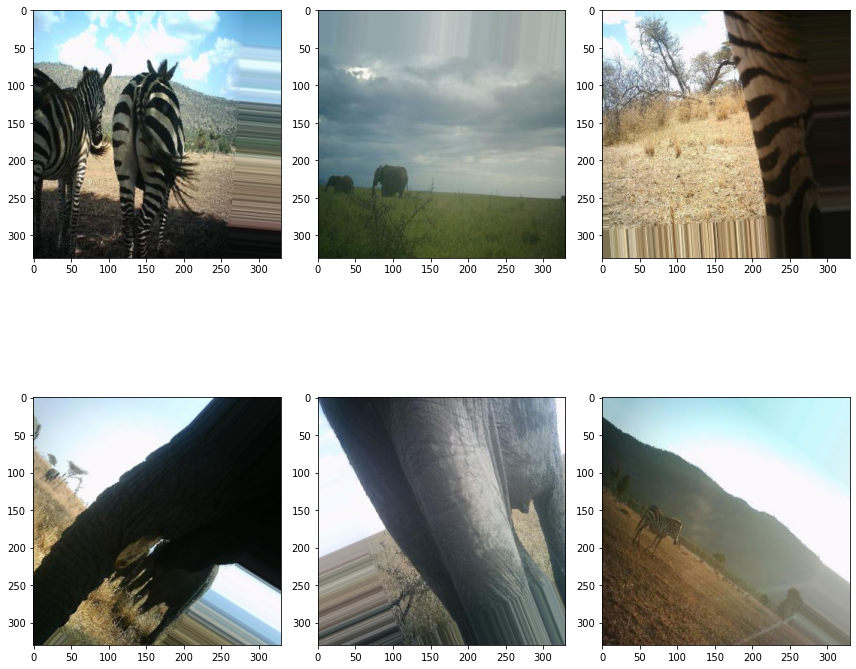

In [18]:
# plt.figure(figsize=(12, 12))
# for i in range(0, 6):
#     plt.subplot(2, 3, i+1)
#     for X_batch, Y_batch in validation_generator:
#         image = X_batch[0]
#         plt.imshow(image)
#         break
# plt.tight_layout()
# plt.show()

In [19]:
model = ks.models.Sequential()

model.add(ks.layers.Dense(4, input_shape=(330, 330, 3)))

model.add(ks.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(ks.layers.MaxPooling2D(2, 2))

model.add(ks.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(ks.layers.MaxPooling2D(2, 2))


model.add(ks.layers.Conv2D(256, (3, 3), activation='relu'))
model.add(ks.layers.MaxPooling2D(2, 2))

model.add(ks.layers.Conv2D(512, (3, 3), activation='relu'))
model.add(ks.layers.MaxPooling2D(2, 2))
model.add(ks.layers.Dropout(0.2))

        
model.add(ks.layers.Flatten())
        
model.add(ks.layers.Dense(1024, activation='relu'))

model.add(ks.layers.Dense(2, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

2022-08-14 11:29:20.944375: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-14 11:29:21.073658: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-14 11:29:21.074537: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-14 11:29:21.076424: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [ ]:
batch_size=20
FAST_RUN = False
epochs=5 if FAST_RUN else 20
history = model.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator
)

2022-08-14 11:29:24.897306: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20


2022-08-14 11:29:28.262189: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


241/394 [=================>............] - ETA: 2:32 - loss: 0.6902 - acc: 0.6619

In [ ]:
p=[]
from PIL import Image
for i in test:
    img = np.array(Image.open(i).resize((330,330))).reshape((1, 330, 330 , 3))
    out = model(img)
#     print(out)
#     print(tf.get_static_value(tf.math.argmax(out, axis=1)))
    p.append(tf.get_static_value(tf.math.argmax(out, axis=1)))

In [ ]:
tf.get_static_value(tf.math.argmax(out, axis=1))

In [ ]:
len(id_)

In [ ]:
p=[i[0] for i in p]

In [ ]:
submission=pd.DataFrame({"id":id_,"label":p})
submission.to_csv("sub2.csv", index=False)